# Mini Projeto - Machine Learning

## 3ª Etapa: Classificação completo de digitos - estratégia 1 contra todos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from linear_models import *
from utils import *

In [2]:
new_train_df = pd.read_csv('./dados/train_reduced.csv')
new_test_df = pd.read_csv('./dados/test_reduced.csv')

In [3]:
# carregue sua base de dados de imagens e rótulos
X_train = new_train_df[['intensidade', 'simetria']]
X_train = X_train.to_numpy()
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

X_test = new_test_df[['intensidade', 'simetria']]
X_test = X_test.to_numpy()
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

y_train = new_train_df['label']
y_train = y_train.to_numpy()

y_test = new_test_df['label']
y_test = y_test.to_numpy()

# crie três classificadores binários usando a estratégia "um contra todos"
all_w = []
# lr = LinearRegression()

Nmin = np.ceil(X_train.shape[0] * 0.5).astype(int)
Nmax = np.ceil(X_train.shape[0] * 1.0).astype(int)

# lr = PocketPLA(4000, Nmin=Nmin, Nmax=Nmax)
lr = LogisticRegression(tmax=400000, batch_size=256)
digitos = [0, 1, 4, 5]
d_anterior = None

for i, d in enumerate(digitos[:-1]):
    # atribua a classe i como positiva e as outras como negativas
    if i == 0:
        y_train_i = np.where(y_train == d, 1, -1)
        
        # crie o classificador binário
        lr.fit(X_train, y_train_i)
        
        # armazene o classificador
        all_w.append(lr.get_w())
        d_anterior = d

    else:
        X_train = np.delete(X_train, np.where(y_train == d_anterior), axis=0)
        y_train = np.delete(y_train, np.where(y_train == d_anterior))
    
        y_train_i = np.where(y_train == d, 1, -1)
        
        # crie o classificador binário
        lr.fit(X_train, y_train_i)
        
        # armazene o classificador
        all_w.append(lr.get_w())
        d_anterior = d
        
# use os classificadores para prever o rótulo da imagem teste
def predict_digit(X):
    predictions = []
    for i, x in enumerate(X):
        for j, d in enumerate(digitos[:-1]):
            if np.sign( all_w[j] @ x) == 1:
                predictions.append(d)
                break

        if len(predictions) < i+1:
            predictions.append(digitos[-1])
    return np.array(predictions)
    
    # se nenhuma classe foi atribuída, atribua a classe 5
    if len(predictions) == 0:
        predictions.append(digitos[-1])
    
    # retorne a classe atribuída
    return predictions[0]


# all_w

100%|██████████| 400000/400000 [01:40<00:00, 3968.67it/s]


In [4]:
ypred = predict_digit(X_test)
# calcule a acurácia
print(accuracy_score(y_test, ypred))
from collections import Counter
counter_pred = Counter(ypred)
counter_ytest = Counter(y_test)
print(counter_pred)
print(counter_ytest)

0.7856502242152467
Counter({0: 385, 4: 301, 1: 292, 5: 137})
Counter({4: 314, 1: 292, 5: 291, 0: 218})


In [5]:
all_w

[array([-112.88520351,    1.55444061,   -0.3821691 ]),
 array([46.35153773, -0.37588058, -0.19748065]),
 array([166.99228543,   6.31035011,  -6.14634117])]

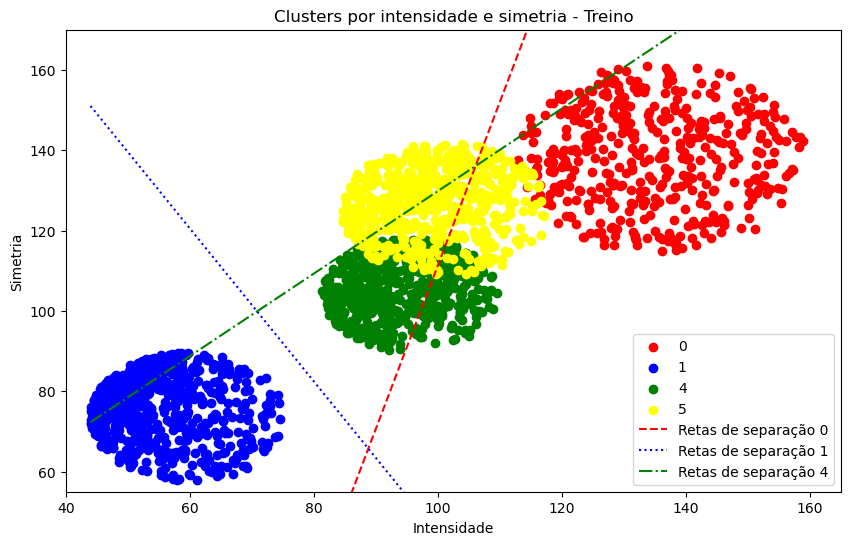

In [6]:
plot_classification_digits(new_train_df, digitos, ['red', 'blue', 'green', 'yellow'], 'Clusters por intensidade e simetria - Treino', all_w[:4])
